In [ ]:
import os
import cv2
import numpy as np

def load_images_from_paths(image_paths):
    """
    Carrega imagens a partir de uma lista de caminhos e retorna uma lista de arrays numpy.

    Args:
        image_paths (list of str): Lista de caminhos para imagens.

    Returns:
        list: Lista de arrays numpy representando as imagens carregadas.
    """
    images = []
    for image_path in image_paths:
        abs_path = os.path.abspath(image_path)
        if not os.path.exists(abs_path):
            print(f"[ERRO] Arquivo não encontrado: {abs_path}")
            continue
        img = cv2.imread(abs_path)
        if img is not None:
            images.append(img)
        else:
            print(f"[ERRO] Falha ao carregar imagem (formato inválido?): {abs_path}")
    return images
# Defina o caminho para o diretório de imagens
paths = [
    '../defungi_dataset/BBH/H6_4b_4.jpg',
    '../defungi_dataset/GMA/H3_3a_10.jpg',
    '../defungi_dataset/SHC/H5_104a_2.jpg',
    '../defungi_dataset/BBH/H6_52a_13.jpg',
    '../defungi_dataset/GMA/H3_25a_2.jpg',
    '../defungi_dataset/BBH/H6_56b_2.jpg',
    '../defungi_dataset/TSH/H1_116b_11.jpg',
    '../defungi_dataset/SHC/H5_36a_4.jpg',
]

images = load_images_from_paths(paths)

    # Exiba o número de imagens carregadas
print(f"Total de imagens carregadas do diretório {paths}: {len(images)}")

# Exiba o número de imagens carregadas
print(f"Total de imagens carregadas: {len(images)}")

Total de imagens carregadas do diretório ['../defungi_dataset/BBH/H6_4b_4.jpg', '../defungi_dataset/GMA/H3_3a_10.jpg', '../defungi_dataset/SHC/H5_104a_2.jpg', '../defungi_dataset/BBH/H6_52a_13.jpg', '../defungi_dataset/GMA/H3_25a_2.jpg', '../defungi_dataset/BBH/H6_56b_2.jpg', '../defungi_dataset/TSH/H1_116b_11.jpg', '../defungi_dataset/SHC/H5_36a_4.jpg']: 8
Total de imagens carregadas: 8


In [58]:
import matplotlib.pyplot as plt
    
def plot_image_grid(images, nrows=None, ncols=None, size=128):
    if nrows is None:
        nrows = 1
    if ncols is None:
        ncols = len(images)

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(images):
            img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # BGR → RGB para mostrar corretamente
            ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

In [101]:
def increase_saturation(image, value=50):
    """
    Aumenta a saturação da imagem.

    Args:
        image (np.ndarray): Imagem em BGR.
        value (int): Valor a ser adicionado à saturação (0–255).

    Returns:
        np.ndarray: Imagem com saturação aumentada.
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    # Adiciona valor com saturação limitada a 255
    s = np.clip(s.astype(np.int32) + value, 0, 255).astype(np.uint8)
    
    hsv_saturated = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv_saturated, cv2.COLOR_HSV2BGR)


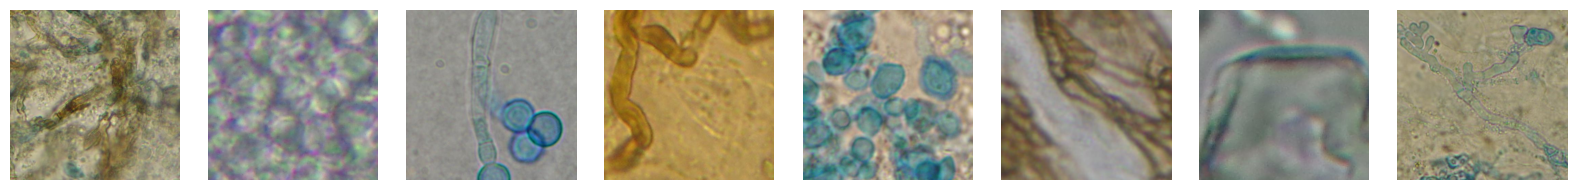

In [102]:
plot_image_grid(images=images)


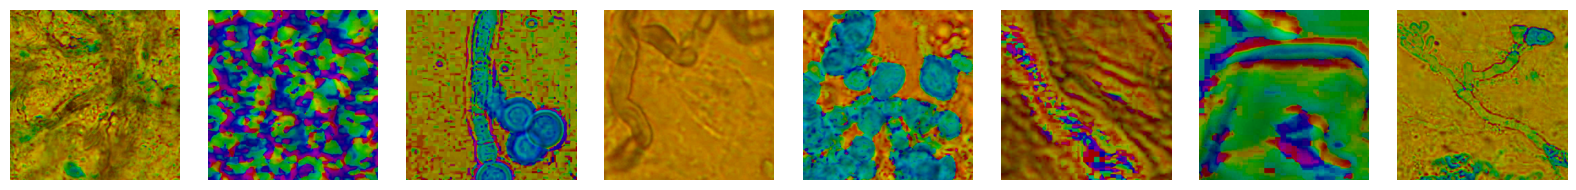

In [106]:
images_saturated = [increase_saturation(img, value=255) for img in images]
plot_image_grid(images=images_saturated)

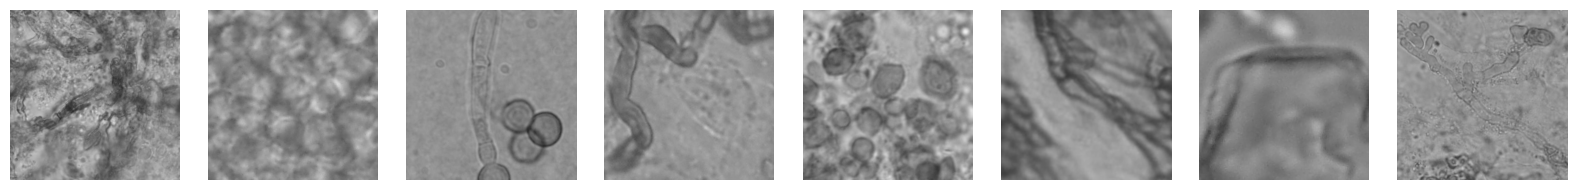

In [60]:
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
plot_image_grid(images=images_gray, ncols=8, nrows=1)

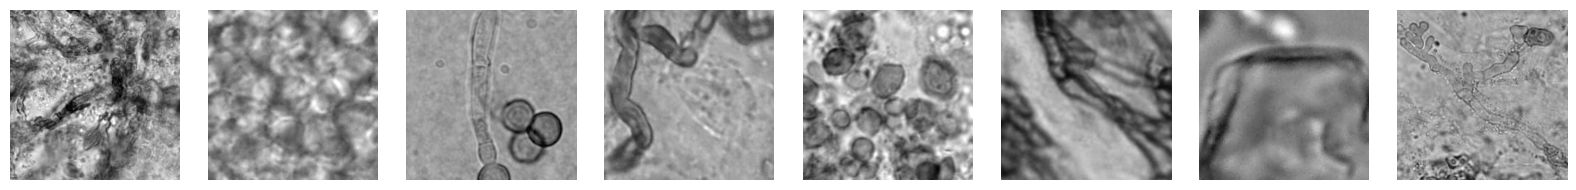

In [61]:
images_brightness_fix = [cv2.convertScaleAbs(image, alpha=1.7, beta=-90) for image in images_gray]
plot_image_grid(images=images_brightness_fix, ncols=8, nrows=1)

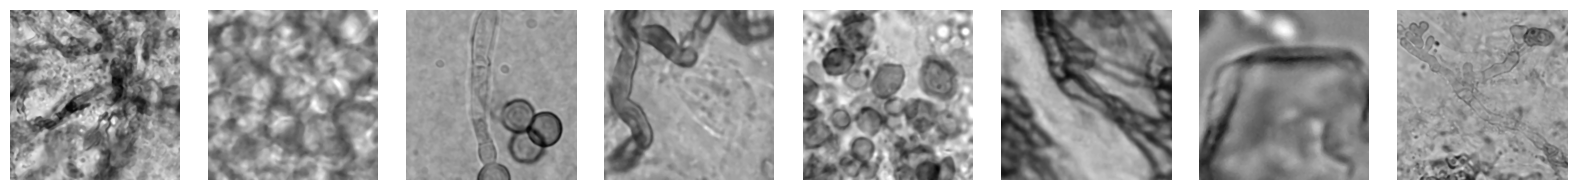

In [72]:
images_median_filtered = [cv2.medianBlur(image, ksize=7) for image in images_brightness_fix]
plot_image_grid(images=images_median_filtered)

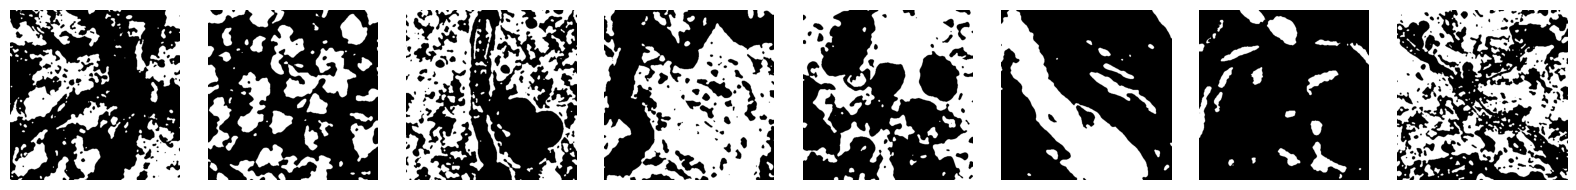

In [93]:
images_binary = [cv2.threshold(img,155, 255, cv2.THRESH_BINARY)[1] for img in images_median_filtered]
plot_image_grid(images=images_binary)

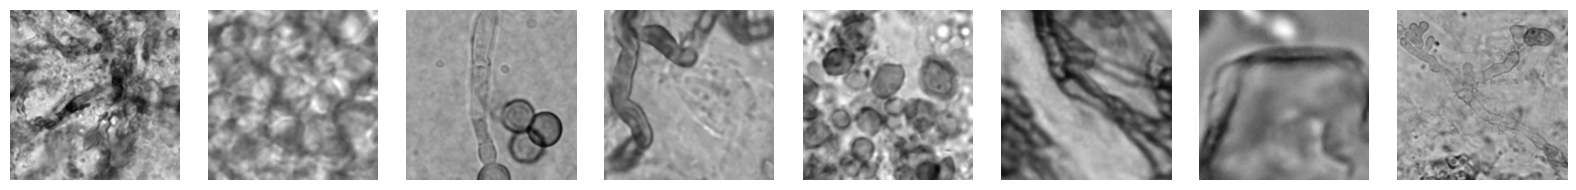

In [95]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
images_cleaned = [cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) for img in images_median_filtered]
plot_image_grid(images_cleaned)

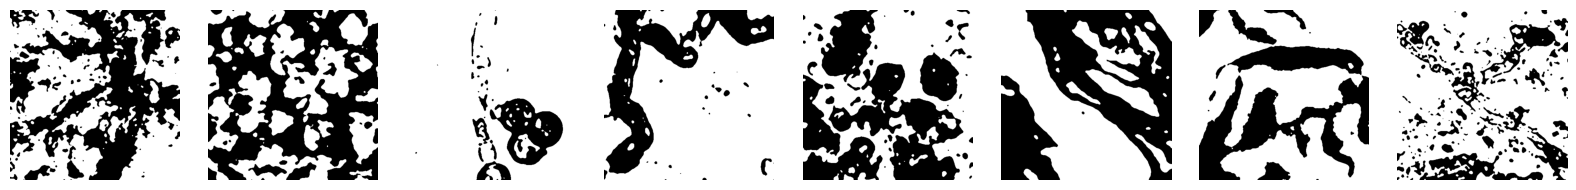

In [78]:
images_binary = [cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )[1] for img in images_median_filtered]
plot_image_grid(images=images_binary)